In [1]:
*** Settings ***

Library  REST
Library  SeleniumLibrary
Library  SeleniumScreenshots

Test setup  Set default headers

*** Variables ***

${BASE_URL}  https://plonedemo.kitconcept.com

In [2]:
*** Keywords ***

Open singleton browser
    [Documentation]
    ...  Open a new browser window on the first call
    ...  and selects that window on the subsequent calls.
    ${browser is open}=  Run keyword and return status
    ...  Switch browser  singleton
    Run keyword if  ${browser is open}
    ...  Go to  about:blank
    ...  ELSE
    ...  Open browser  about:blank  alias=singleton  browser=headlessfirefox

Get authentication token
    Open singleton browser
    Go to  ${BASE_URL}/en/login
    Page should contain  Login as Editor
    Click link  Login as Editor
    Page should contain  You are now logged in
    ${cookie}=  Get cookie  __ac
    [Return]  ${cookie.value}

Set default headers
    ${token}=  Get authentication token
    ${headers}=  Create dictionary
    ...  Accept=application/json
    ...  ContentType=application/json
    ...  Cookie=__ac=${token}
    Set headers  ${headers}

In [5]:
*** Tasks ***

Get folder listing
    Get  ${BASE_URL}/en
    Output  response body items 1

<a href="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPgo8bWV0YSBodHRwLWVxdWl2PSJQcmFnbWEiIGNvbnRlbnQ9Im5vLWNhY2hlIj4KPG1ldGEgaHR0cC1lcXVpdj0iRXhwaXJlcyIgY29udGVudD0iLTEiPgo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPgo8bWV0YSBjb250ZW50PSJSb2JvdCBGcmFtZXdvcmsgMy4xIChQeXRob24gMy43LjIgb24gbGludXgpIiBuYW1lPSJHZW5lcmF0b3IiPgo8bGluayByZWw9Imljb24iIHR5cGU9ImltYWdlL3gtaWNvbiIgaHJlZj0iZGF0YTppbWFnZS94LWljb247YmFzZTY0LEFBQUJBQUVBRUJBQUFBRUFJQUJvQkFBQUZnQUFBQ2dBQUFBUUFBQUFJQUFBQUFFQUlBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFLY0FBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQXFBQUFBQUFBQUFBQUFBQUFBQUFBQUxJQUFBRC9BQUFBNEFBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUEzQUFBQU53QUFBRGNBQUFBNEFBQUFQOEFBQUN4QUFBQUFBQUFBS1lBQUFEL0FBQUF1d0FBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQy9BQUFBL3dBQUFLa0FBQUQ2QUFBQXpBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU44QUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFnQUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBYXdBQUFHc0FBQUJyQUFBQURBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFJc0FBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFORUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBQUFBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBeUFBQUFNZ0FBQURJQUFBQUZBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBRHdBQUFCOEFBQUFBQUFBQUdBQUFBQmNBQUFBQUFBQUFIOEFBQUJLQUFBQUFBQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDZBQUFBd3dBQUFBQUFBQURDQUFBQS93QUFBQ2tBQUFEcUFBQUE0UUFBQUFBQUFBRDdBQUFBL3dBQUFMQUFBQUFHQUFBQUFBQUFBTm9BQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBSXdBQUFQNEFBQUQvQUFBQS93QUFBR0FBQUFBQUFBQUFBQUFBQU1rQUFBRC9BQUFBaWdBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUFBQUFBQUlBQUFBY0FBQUFCa0FBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFFZ0FBQUFBQUFBQUFBQUFBMmdBQUFQOEFBQUQ3QUFBQXl3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU40QUFBRC9BQUFBcXdBQUFQOEFBQUN2QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUFzZ0FBQUFBQUFBQzVBQUFBL3dBQUFNb0FBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1BQUFBREFBQUFBd0FBQUFNa0FBQUQvQUFBQXZBQUFBQUFBQUFBQUFBQUFBQUFBQUt3QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBclFBQUFBQUFBQUFBd0FNQUFJQUJBQUFmK0FBQVAvd0FBRC84QUFBZ0JBQUFQL3dBQUQvOEFBQS8vQUFBSkl3QUFESEVBQUEvL0FBQVAvd0FBQi80QUFDQUFRQUF3QU1BQUE9PSI+CjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+Ci8qIEdlbmVyaWMgYW5kIG1pc2Mgc3R5bGVzICovCmJvZHkgewogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsKICAgIGZvbnQtc2l6ZTogMC44ZW07CiAgICBjb2xvcjogYmxhY2s7CiAgICBwYWRkaW5nOiA2cHg7CiAgICBiYWNrZ3JvdW5kOiB3aGl0ZTsKfQp0YWJsZSB7CiAgICB0YWJsZS1sYXlvdXQ6IGZpeGVkOwogICAgd29yZC13cmFwOiBicmVhay13b3JkOwogICAgZW1wdHktY2VsbHM6IHNob3c7CiAgICBmb250LXNpemU6IDFlbTsKfQp0aCwgdGQgewogICAgdmVydGljYWwtYWxpZ246IHRvcDsKfQpiciB7CiAgICBtc28tZGF0YS1wbGFjZW1lbnQ6IHNhbWUtY2VsbDsgLyogbWFpbnRhaW4gbGluZSBicmVha3MgaW4gRXhjZWwgKi8KfQpociB7CiAgICBiYWNrZ3JvdW5kOiAjY2NjOwogICAgaGVpZ2h0OiAxcHg7CiAgICBib3JkZXI6IDA7Cn0KYSwgYTpsaW5rLCBhOnZpc2l0ZWQgewogICAgdGV4dC1kZWNvcmF0aW9uOiBub25lOwogICAgY29sb3I6ICMxNWM7Cn0KYSA+IGltZyB7CiAgICBib3JkZXI6IDFweCBzb2xpZCAjMTVjICFpbXBvcnRhbnQ7Cn0KYTpob3ZlciwgYTphY3RpdmUgewogICAgdGV4dC1kZWNvcmF0aW9uOiB1bmRlcmxpbmU7CiAgICBjb2xvcjogIzYxYzsKfQoucGFyZW50LW5hbWUgewogICAgZm9udC1zaXplOiAwLjdlbTsKICAgIGxldHRlci1zcGFjaW5nOiAtMC4wN2VtOwp9Ci5tZXNzYWdlIHsKICAgIHdoaXRlLXNwYWNlOiBwcmUtd3JhcDsKfQovKiBIZWFkZXJzICovCiNoZWFkZXIgewogICAgd2lkdGg6IDY1ZW07CiAgICBoZWlnaHQ6IDNlbTsKICAgIG1hcmdpbjogNnB4IDA7Cn0KaDEgewogICAgZmxvYXQ6IGxlZnQ7CiAgICBtYXJnaW46IDAgMCAwLjVlbSAwOwogICAgd2lkdGg6IDc1JTsKfQpoMiB7CiAgICBjbGVhcjogbGVmdDsKfQojZ2VuZXJhdGVkIHsKICAgIGZsb2F0OiByaWdodDsKICAgIHRleHQtYWxpZ246IHJpZ2h0OwogICAgZm9udC1zaXplOiAwLjllbTsKICAgIHdoaXRlLXN

{
 "@id" : "https://plonedemo.kitconcept.com/en/frontpage" ,
 "@type" : "Document" ,
 "description" : "The ultimate Open Source Enterprise CMS" ,
 "review_state" : "published" ,
 "title" : "Welcome to Plone 5" 
}

<a href="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPgo8bWV0YSBodHRwLWVxdWl2PSJQcmFnbWEiIGNvbnRlbnQ9Im5vLWNhY2hlIj4KPG1ldGEgaHR0cC1lcXVpdj0iRXhwaXJlcyIgY29udGVudD0iLTEiPgo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPgo8bWV0YSBjb250ZW50PSJSb2JvdCBGcmFtZXdvcmsgMy4xIChQeXRob24gMy43LjIgb24gbGludXgpIiBuYW1lPSJHZW5lcmF0b3IiPgo8bGluayByZWw9Imljb24iIHR5cGU9ImltYWdlL3gtaWNvbiIgaHJlZj0iZGF0YTppbWFnZS94LWljb247YmFzZTY0LEFBQUJBQUVBRUJBQUFBRUFJQUJvQkFBQUZnQUFBQ2dBQUFBUUFBQUFJQUFBQUFFQUlBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFLY0FBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQXFBQUFBQUFBQUFBQUFBQUFBQUFBQUxJQUFBRC9BQUFBNEFBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUEzQUFBQU53QUFBRGNBQUFBNEFBQUFQOEFBQUN4QUFBQUFBQUFBS1lBQUFEL0FBQUF1d0FBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQy9BQUFBL3dBQUFLa0FBQUQ2QUFBQXpBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU44QUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFnQUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBYXdBQUFHc0FBQUJyQUFBQURBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFJc0FBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFORUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBQUFBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBeUFBQUFNZ0FBQURJQUFBQUZBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBRHdBQUFCOEFBQUFBQUFBQUdBQUFBQmNBQUFBQUFBQUFIOEFBQUJLQUFBQUFBQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDZBQUFBd3dBQUFBQUFBQURDQUFBQS93QUFBQ2tBQUFEcUFBQUE0UUFBQUFBQUFBRDdBQUFBL3dBQUFMQUFBQUFHQUFBQUFBQUFBTm9BQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBSXdBQUFQNEFBQUQvQUFBQS93QUFBR0FBQUFBQUFBQUFBQUFBQU1rQUFBRC9BQUFBaWdBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUFBQUFBQUlBQUFBY0FBQUFCa0FBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFFZ0FBQUFBQUFBQUFBQUFBMmdBQUFQOEFBQUQ3QUFBQXl3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU40QUFBRC9BQUFBcXdBQUFQOEFBQUN2QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUFzZ0FBQUFBQUFBQzVBQUFBL3dBQUFNb0FBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1BQUFBREFBQUFBd0FBQUFNa0FBQUQvQUFBQXZBQUFBQUFBQUFBQUFBQUFBQUFBQUt3QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBclFBQUFBQUFBQUFBd0FNQUFJQUJBQUFmK0FBQVAvd0FBRC84QUFBZ0JBQUFQL3dBQUQvOEFBQS8vQUFBSkl3QUFESEVBQUEvL0FBQVAvd0FBQi80QUFDQUFRQUF3QU1BQUE9PSI+CjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+Ci8qIEdlbmVyaWMgYW5kIG1pc2Mgc3R5bGVzICovCmJvZHkgewogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsKICAgIGZvbnQtc2l6ZTogMC44ZW07CiAgICBjb2xvcjogYmxhY2s7CiAgICBwYWRkaW5nOiA2cHg7CiAgICBiYWNrZ3JvdW5kOiB3aGl0ZTsKfQp0YWJsZSB7CiAgICB0YWJsZS1sYXlvdXQ6IGZpeGVkOwogICAgd29yZC13cmFwOiBicmVhay13b3JkOwogICAgZW1wdHktY2VsbHM6IHNob3c7CiAgICBmb250LXNpemU6IDFlbTsKfQp0aCwgdGQgewogICAgdmVydGljYWwtYWxpZ246IHRvcDsKfQpiciB7CiAgICBtc28tZGF0YS1wbGFjZW1lbnQ6IHNhbWUtY2VsbDsgLyogbWFpbnRhaW4gbGluZSBicmVha3MgaW4gRXhjZWwgKi8KfQpociB7CiAgICBiYWNrZ3JvdW5kOiAjY2NjOwogICAgaGVpZ2h0OiAxcHg7CiAgICBib3JkZXI6IDA7Cn0KYSwgYTpsaW5rLCBhOnZpc2l0ZWQgewogICAgdGV4dC1kZWNvcmF0aW9uOiBub25lOwogICAgY29sb3I6ICMxNWM7Cn0KYSA+IGltZyB7CiAgICBib3JkZXI6IDFweCBzb2xpZCAjMTVjICFpbXBvcnRhbnQ7Cn0KYTpob3ZlciwgYTphY3RpdmUgewogICAgdGV4dC1kZWNvcmF0aW9uOiB1bmRlcmxpbmU7CiAgICBjb2xvcjogIzYxYzsKfQoucGFyZW50LW5hbWUgewogICAgZm9udC1zaXplOiAwLjdlbTsKICAgIGxldHRlci1zcGFjaW5nOiAtMC4wN2VtOwp9Ci5tZXNzYWdlIHsKICAgIHdoaXRlLXNwYWNlOiBwcmUtd3JhcDsKfQovKiBIZWFkZXJzICovCiNoZWFkZXIgewogICAgd2lkdGg6IDY1ZW07CiAgICBoZWlnaHQ6IDNlbTsKICAgIG1hcmdpbjogNnB4IDA7Cn0KaDEgewogICAgZmxvYXQ6IGxlZnQ7CiAgICBtYXJnaW46IDAgMCAwLjVlbSAwOwogICAgd2lkdGg6IDc1JTsKfQpoMiB7CiAgICBjbGVhcjogbGVmdDsKfQojZ2VuZXJhdGVkIHsKICAgIGZsb2F0OiByaWdodDsKICAgIHRleHQtYWxpZ246IHJpZ2h0OwogICAgZm9udC1zaXplOiAwLjllbTsKICAgIHdoaXRlLXN

{
 "content-type" : "text/html" ,
 "data" : "<p>Edit this site and test Plone now!<p>" ,
 "encoding" : "utf8" 
}

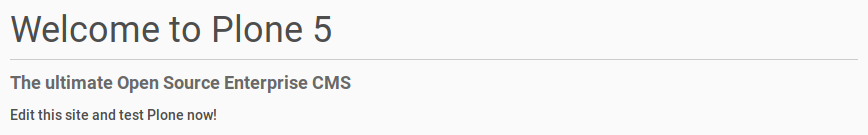

In [9]:
*** Tasks ***

Get front page
    Go to  ${BASE_URL}/en/frontpage
    Capture and crop page screenshot
    ...  screenshot.png
    ...  id:content
    Get  ${BASE_URL}/en/frontpage
    Output  response body text

In [10]:
*** Tasks ***

Patch front page
    ${payload}=  Create dictionary
    ...  title=Hello World!
    ...  description=This is the front page.
    ...  text=<p>Here be much great content very.<p>
    Patch  ${BASE_URL}/en/frontpage  ${payload}

<a href="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPgo8bWV0YSBodHRwLWVxdWl2PSJQcmFnbWEiIGNvbnRlbnQ9Im5vLWNhY2hlIj4KPG1ldGEgaHR0cC1lcXVpdj0iRXhwaXJlcyIgY29udGVudD0iLTEiPgo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPgo8bWV0YSBjb250ZW50PSJSb2JvdCBGcmFtZXdvcmsgMy4xIChQeXRob24gMy43LjIgb24gbGludXgpIiBuYW1lPSJHZW5lcmF0b3IiPgo8bGluayByZWw9Imljb24iIHR5cGU9ImltYWdlL3gtaWNvbiIgaHJlZj0iZGF0YTppbWFnZS94LWljb247YmFzZTY0LEFBQUJBQUVBRUJBQUFBRUFJQUJvQkFBQUZnQUFBQ2dBQUFBUUFBQUFJQUFBQUFFQUlBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFLY0FBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQXFBQUFBQUFBQUFBQUFBQUFBQUFBQUxJQUFBRC9BQUFBNEFBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUEzQUFBQU53QUFBRGNBQUFBNEFBQUFQOEFBQUN4QUFBQUFBQUFBS1lBQUFEL0FBQUF1d0FBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQy9BQUFBL3dBQUFLa0FBQUQ2QUFBQXpBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU44QUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFnQUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBYXdBQUFHc0FBQUJyQUFBQURBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFJc0FBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFORUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBQUFBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBeUFBQUFNZ0FBQURJQUFBQUZBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBRHdBQUFCOEFBQUFBQUFBQUdBQUFBQmNBQUFBQUFBQUFIOEFBQUJLQUFBQUFBQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDZBQUFBd3dBQUFBQUFBQURDQUFBQS93QUFBQ2tBQUFEcUFBQUE0UUFBQUFBQUFBRDdBQUFBL3dBQUFMQUFBQUFHQUFBQUFBQUFBTm9BQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBSXdBQUFQNEFBQUQvQUFBQS93QUFBR0FBQUFBQUFBQUFBQUFBQU1rQUFBRC9BQUFBaWdBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUFBQUFBQUlBQUFBY0FBQUFCa0FBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFFZ0FBQUFBQUFBQUFBQUFBMmdBQUFQOEFBQUQ3QUFBQXl3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU40QUFBRC9BQUFBcXdBQUFQOEFBQUN2QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUFzZ0FBQUFBQUFBQzVBQUFBL3dBQUFNb0FBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1BQUFBREFBQUFBd0FBQUFNa0FBQUQvQUFBQXZBQUFBQUFBQUFBQUFBQUFBQUFBQUt3QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBclFBQUFBQUFBQUFBd0FNQUFJQUJBQUFmK0FBQVAvd0FBRC84QUFBZ0JBQUFQL3dBQUQvOEFBQS8vQUFBSkl3QUFESEVBQUEvL0FBQVAvd0FBQi80QUFDQUFRQUF3QU1BQUE9PSI+CjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+Ci8qIEdlbmVyaWMgYW5kIG1pc2Mgc3R5bGVzICovCmJvZHkgewogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsKICAgIGZvbnQtc2l6ZTogMC44ZW07CiAgICBjb2xvcjogYmxhY2s7CiAgICBwYWRkaW5nOiA2cHg7CiAgICBiYWNrZ3JvdW5kOiB3aGl0ZTsKfQp0YWJsZSB7CiAgICB0YWJsZS1sYXlvdXQ6IGZpeGVkOwogICAgd29yZC13cmFwOiBicmVhay13b3JkOwogICAgZW1wdHktY2VsbHM6IHNob3c7CiAgICBmb250LXNpemU6IDFlbTsKfQp0aCwgdGQgewogICAgdmVydGljYWwtYWxpZ246IHRvcDsKfQpiciB7CiAgICBtc28tZGF0YS1wbGFjZW1lbnQ6IHNhbWUtY2VsbDsgLyogbWFpbnRhaW4gbGluZSBicmVha3MgaW4gRXhjZWwgKi8KfQpociB7CiAgICBiYWNrZ3JvdW5kOiAjY2NjOwogICAgaGVpZ2h0OiAxcHg7CiAgICBib3JkZXI6IDA7Cn0KYSwgYTpsaW5rLCBhOnZpc2l0ZWQgewogICAgdGV4dC1kZWNvcmF0aW9uOiBub25lOwogICAgY29sb3I6ICMxNWM7Cn0KYSA+IGltZyB7CiAgICBib3JkZXI6IDFweCBzb2xpZCAjMTVjICFpbXBvcnRhbnQ7Cn0KYTpob3ZlciwgYTphY3RpdmUgewogICAgdGV4dC1kZWNvcmF0aW9uOiB1bmRlcmxpbmU7CiAgICBjb2xvcjogIzYxYzsKfQoucGFyZW50LW5hbWUgewogICAgZm9udC1zaXplOiAwLjdlbTsKICAgIGxldHRlci1zcGFjaW5nOiAtMC4wN2VtOwp9Ci5tZXNzYWdlIHsKICAgIHdoaXRlLXNwYWNlOiBwcmUtd3JhcDsKfQovKiBIZWFkZXJzICovCiNoZWFkZXIgewogICAgd2lkdGg6IDY1ZW07CiAgICBoZWlnaHQ6IDNlbTsKICAgIG1hcmdpbjogNnB4IDA7Cn0KaDEgewogICAgZmxvYXQ6IGxlZnQ7CiAgICBtYXJnaW46IDAgMCAwLjVlbSAwOwogICAgd2lkdGg6IDc1JTsKfQpoMiB7CiAgICBjbGVhcjogbGVmdDsKfQojZ2VuZXJhdGVkIHsKICAgIGZsb2F0OiByaWdodDsKICAgIHRleHQtYWxpZ246IHJpZ2h0OwogICAgZm9udC1zaXplOiAwLjllbTsKICAgIHdoaXRlLXN

{
 "seconds" : 0.469161 ,
 "status" : 204 ,
 "body" : "" ,
 "headers" : {
 "Server" : "nginx/1.14.2" ,
 "Date" : "Sat, 12 Jan 2019 20:41:17 GMT" ,
 "Connection" : "keep-alive" 
 }
}

<a href="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPgo8bWV0YSBodHRwLWVxdWl2PSJQcmFnbWEiIGNvbnRlbnQ9Im5vLWNhY2hlIj4KPG1ldGEgaHR0cC1lcXVpdj0iRXhwaXJlcyIgY29udGVudD0iLTEiPgo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPgo8bWV0YSBjb250ZW50PSJSb2JvdCBGcmFtZXdvcmsgMy4xIChQeXRob24gMy43LjIgb24gbGludXgpIiBuYW1lPSJHZW5lcmF0b3IiPgo8bGluayByZWw9Imljb24iIHR5cGU9ImltYWdlL3gtaWNvbiIgaHJlZj0iZGF0YTppbWFnZS94LWljb247YmFzZTY0LEFBQUJBQUVBRUJBQUFBRUFJQUJvQkFBQUZnQUFBQ2dBQUFBUUFBQUFJQUFBQUFFQUlBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFLY0FBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQXFBQUFBQUFBQUFBQUFBQUFBQUFBQUxJQUFBRC9BQUFBNEFBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUEzQUFBQU53QUFBRGNBQUFBNEFBQUFQOEFBQUN4QUFBQUFBQUFBS1lBQUFEL0FBQUF1d0FBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQy9BQUFBL3dBQUFLa0FBQUQ2QUFBQXpBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU44QUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFnQUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBYXdBQUFHc0FBQUJyQUFBQURBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFJc0FBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFORUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBQUFBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBeUFBQUFNZ0FBQURJQUFBQUZBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBRHdBQUFCOEFBQUFBQUFBQUdBQUFBQmNBQUFBQUFBQUFIOEFBQUJLQUFBQUFBQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDZBQUFBd3dBQUFBQUFBQURDQUFBQS93QUFBQ2tBQUFEcUFBQUE0UUFBQUFBQUFBRDdBQUFBL3dBQUFMQUFBQUFHQUFBQUFBQUFBTm9BQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBSXdBQUFQNEFBQUQvQUFBQS93QUFBR0FBQUFBQUFBQUFBQUFBQU1rQUFBRC9BQUFBaWdBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUFBQUFBQUlBQUFBY0FBQUFCa0FBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFFZ0FBQUFBQUFBQUFBQUFBMmdBQUFQOEFBQUQ3QUFBQXl3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU40QUFBRC9BQUFBcXdBQUFQOEFBQUN2QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUFzZ0FBQUFBQUFBQzVBQUFBL3dBQUFNb0FBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1BQUFBREFBQUFBd0FBQUFNa0FBQUQvQUFBQXZBQUFBQUFBQUFBQUFBQUFBQUFBQUt3QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBclFBQUFBQUFBQUFBd0FNQUFJQUJBQUFmK0FBQVAvd0FBRC84QUFBZ0JBQUFQL3dBQUQvOEFBQS8vQUFBSkl3QUFESEVBQUEvL0FBQVAvd0FBQi80QUFDQUFRQUF3QU1BQUE9PSI+CjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+Ci8qIEdlbmVyaWMgYW5kIG1pc2Mgc3R5bGVzICovCmJvZHkgewogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsKICAgIGZvbnQtc2l6ZTogMC44ZW07CiAgICBjb2xvcjogYmxhY2s7CiAgICBwYWRkaW5nOiA2cHg7CiAgICBiYWNrZ3JvdW5kOiB3aGl0ZTsKfQp0YWJsZSB7CiAgICB0YWJsZS1sYXlvdXQ6IGZpeGVkOwogICAgd29yZC13cmFwOiBicmVhay13b3JkOwogICAgZW1wdHktY2VsbHM6IHNob3c7CiAgICBmb250LXNpemU6IDFlbTsKfQp0aCwgdGQgewogICAgdmVydGljYWwtYWxpZ246IHRvcDsKfQpiciB7CiAgICBtc28tZGF0YS1wbGFjZW1lbnQ6IHNhbWUtY2VsbDsgLyogbWFpbnRhaW4gbGluZSBicmVha3MgaW4gRXhjZWwgKi8KfQpociB7CiAgICBiYWNrZ3JvdW5kOiAjY2NjOwogICAgaGVpZ2h0OiAxcHg7CiAgICBib3JkZXI6IDA7Cn0KYSwgYTpsaW5rLCBhOnZpc2l0ZWQgewogICAgdGV4dC1kZWNvcmF0aW9uOiBub25lOwogICAgY29sb3I6ICMxNWM7Cn0KYSA+IGltZyB7CiAgICBib3JkZXI6IDFweCBzb2xpZCAjMTVjICFpbXBvcnRhbnQ7Cn0KYTpob3ZlciwgYTphY3RpdmUgewogICAgdGV4dC1kZWNvcmF0aW9uOiB1bmRlcmxpbmU7CiAgICBjb2xvcjogIzYxYzsKfQoucGFyZW50LW5hbWUgewogICAgZm9udC1zaXplOiAwLjdlbTsKICAgIGxldHRlci1zcGFjaW5nOiAtMC4wN2VtOwp9Ci5tZXNzYWdlIHsKICAgIHdoaXRlLXNwYWNlOiBwcmUtd3JhcDsKfQovKiBIZWFkZXJzICovCiNoZWFkZXIgewogICAgd2lkdGg6IDY1ZW07CiAgICBoZWlnaHQ6IDNlbTsKICAgIG1hcmdpbjogNnB4IDA7Cn0KaDEgewogICAgZmxvYXQ6IGxlZnQ7CiAgICBtYXJnaW46IDAgMCAwLjVlbSAwOwogICAgd2lkdGg6IDc1JTsKfQpoMiB7CiAgICBjbGVhcjogbGVmdDsKfQojZ2VuZXJhdGVkIHsKICAgIGZsb2F0OiByaWdodDsKICAgIHRleHQtYWxpZ246IHJpZ2h0OwogICAgZm9udC1zaXplOiAwLjllbTsKICAgIHdoaXRlLXN

{
 "content-type" : "text/html" ,
 "data" : "<p>Here be much great content very.<p>" ,
 "encoding" : "utf8" 
}

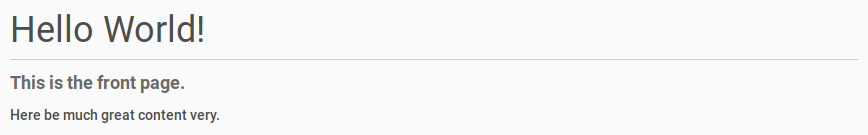

In [11]:
*** Tasks ***

Get front page
    Go to  ${BASE_URL}/en/frontpage
    Capture and crop page screenshot
    ...  screenshot.png
    ...  id:content
    Get  ${BASE_URL}/en/frontpage
    Output  response body text